In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# Create list of all targets (minus background noise)
dataset_path = 'C:/Users/user/Desktop/recording1'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['贅詞', '雜音']


In [3]:
# Settings
feature_sets_path = './'
feature_sets_filename = 'appendEnergyTT_wen.npz'
#model_filename = 'wake_word_stop_model.h5'
#wake_word = '嗯'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(768, 23, 16)
(96, 23, 16)
(96, 23, 16)


In [7]:
# Peek at labels
print(y_val)

[0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]


In [8]:
# Peek at labels after conversion
print(y_test)

[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.]


In [9]:
# View the dimensions of our input data
print(x_train.shape)

(768, 23, 16)


In [10]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(768, 23, 16, 1)
(96, 23, 16, 1)
(96, 23, 16, 1)


In [11]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(23, 16, 1)


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Conv2D(64, (2, 2), activation='relu'))#64
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))#64
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
# Display model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 15, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 7, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 64)         8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 2, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 1, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 1, 128)         0

In [13]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',    #'adam'
              metrics=['acc'])

In [14]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=60,
                    batch_size=30,
                    validation_data=(x_val, y_val))

Epoch 1/60
26/26 [==============================] - 2s 44ms/step - loss: 0.6742 - acc: 0.5578 - val_loss: 0.5280 - val_acc: 0.8021
Epoch 2/60
26/26 [==============================] - 0s 9ms/step - loss: 0.5253 - acc: 0.7461 - val_loss: 0.4238 - val_acc: 0.8646
Epoch 3/60
26/26 [==============================] - 0s 9ms/step - loss: 0.4372 - acc: 0.8146 - val_loss: 0.4521 - val_acc: 0.8125
Epoch 4/60
26/26 [==============================] - 0s 8ms/step - loss: 0.3218 - acc: 0.8694 - val_loss: 0.2960 - val_acc: 0.9375
Epoch 5/60
26/26 [==============================] - 0s 9ms/step - loss: 0.2774 - acc: 0.8954 - val_loss: 0.2794 - val_acc: 0.8854
Epoch 6/60
26/26 [==============================] - 0s 9ms/step - loss: 0.2385 - acc: 0.9003 - val_loss: 0.2182 - val_acc: 0.9375
Epoch 7/60
26/26 [==============================] - 0s 8ms/step - loss: 0.1760 - acc: 0.9444 - val_loss: 0.2082 - val_acc: 0.9271
Epoch 8/60
26/26 [==============================] - 0s 8ms/step - loss: 0.1165 - acc: 0.9

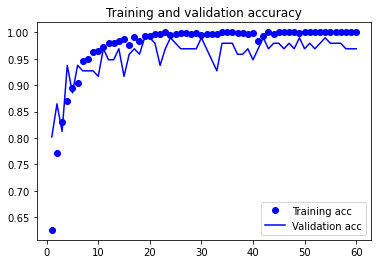

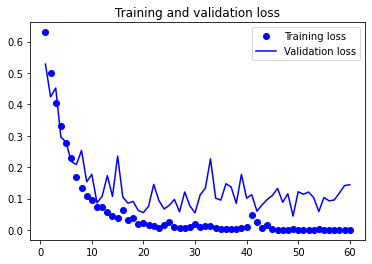

In [18]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# Save the model as a file
models.save_model(model, './h5/appendEnergyTT_wen.h5')

In [20]:
# TEST: Load model and run it against test set
model = models.load_model('./h5/appendEnergyTT_wen.h5')
for i in range(0, 10):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 0.0  Prediction: [[9.9997663e-01 2.3389448e-05]]
Answer: 0.0  Prediction: [[9.9998140e-01 1.8642446e-05]]
Answer: 0.0  Prediction: [[0.9980862  0.00191379]]
Answer: 0.0  Prediction: [[0.9767461  0.02325391]]
Answer: 0.0  Prediction: [[1.000000e+00 8.691786e-11]]
Answer: 0.0  Prediction: [[9.9997056e-01 2.9433751e-05]]
Answer: 1.0  Prediction: [[1.33269165e-08 1.00000000e+00]]
Answer: 1.0  Prediction: [[4.8909794e-08 1.0000000e+00]]
Answer: 1.0  Prediction: [[2.4789067e-08 1.0000000e+00]]
Answer: 1.0  Prediction: [[9.8491055e-06 9.9999011e-01]]


In [21]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0150 - acc: 0.9896


[0.01499494630843401, 0.9895833134651184]

In [22]:
model.evaluate(x=x_trian, y=y_trian)

NameError: name 'x_trian' is not defined